In [47]:
import pandas as pd
from scipy.stats import chisquare 
import numpy as np
import scipy.stats as sc 
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
p=861/3000
sc.stats.chisquare([282,579,139],f_exp=[1000*p,2000*p,1000-3000*p])


Power_divergenceResult(statistic=0.13066202090592335, pvalue=0.9367573355824979)

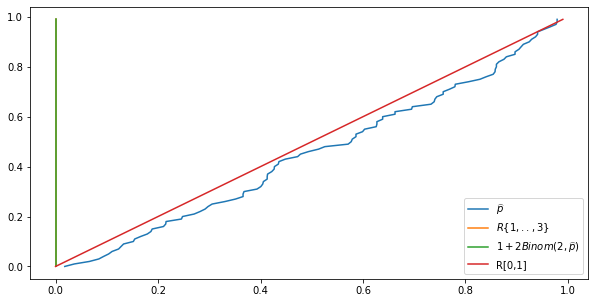

In [57]:
pv1=[]
pv2=[]
pv3=[]
for i in range(0,100):
    y=sc.randint.rvs(1, 4, loc=0, size=1000, random_state=None)
    y=np.unique(y, return_counts=True)[1]
    z=1+sc.binom.rvs(2, p, size = 1000)
    z=np.unique(z, return_counts=True)[1]
    x=sc.multinomial.rvs(1000, [1-3*p,p,2*p] , size=1)
    pv1.append(sc.stats.chisquare([x[0][0],x[0][1],x[0][2]],f_exp=[1000-3000*p,1000*p,2000*p])[1])
    pv2.append(sc.stats.chisquare(y,f_exp=[1000-3000*p,1000*p,2000*p])[1])
    pv3.append(sc.stats.chisquare(z,f_exp=[1000-3000*p,1000*p,2000*p])[1])
pv1=sorted(pv1)
pv2=sorted(pv2)
pv3=sorted(pv3)
plt.figure(figsize=(10,5))
x = np.arange(0,1, 1/100)
plt.plot(list(map(lambda x: pv1[int(x*100)],x)),x, label = r'$\widehat{p}$')
plt.plot(list(map(lambda x: pv2[int(x*100)],x)),x, label = r'$R\{1,..,3\}$')
plt.plot(list(map(lambda x: pv3[int(x*100)],x)),x, label = r'$1+2Binom(2,\widehat{p})$')
plt.plot(list(map(lambda x: x,x)), x, label = 'R[0,1]')
plt.legend()
plt.show()
